In [1]:
import matplotlib.pyplot as plt
import pickle
import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
model_dirs = glob.glob('/home/bartoldson1/surrogates4sims/tb/*')
def build_result_df(aggregator):
    result = pd.read_pickle(model_dirs[0]+'/results.p')
    result['window'] = int(model_dirs[0].split('_')[5][1:])
    result['latentDim'] = int(model_dirs[0].split('_')[6][9:])
    result['svd_rel_err'] = aggregator(result['svd_rel_err'])
    result['LIN_z_mean_rel_error'] = aggregator(result['LIN_z_mean_rel_error'])
    result['lin_rel_err'] = aggregator(result['lin_rel_err'])
    results = pd.DataFrame(result,index=[0])
    for i, m in enumerate(model_dirs[1:],1):
        result = pd.read_pickle(m+'/results.p')
        result['window'] = int(m.split('_')[5][1:])
        result['latentDim'] = int(m.split('_')[6][9:])
        result['svd_rel_err'] = aggregator(result['svd_rel_err'])
        result['LIN_z_mean_rel_error'] = aggregator(result['LIN_z_mean_rel_error'])
        result['lin_rel_err'] = aggregator(result['lin_rel_err'])
        results=results.append(pd.DataFrame(result, index=[i]))
    return results
results = build_result_df(np.mean)
results

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,window,latentDim
0,1.425343,0.477671,1.266604,1,8
1,1.607939,0.386641,1.366756,1,16
2,1.802175,0.314556,1.585935,1,32
3,2.377189,0.247330,2.119684,1,64
4,0.753809,0.477671,0.783792,10,8
5,0.989599,0.386641,0.904912,10,16
6,1.834985,0.314556,1.616002,10,32
7,1.880899,0.247330,1.994369,10,64
8,0.472091,0.477671,0.607385,20,8
9,0.522190,0.386641,0.579172,20,16


In [3]:
results.groupby('window').mean()

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,latentDim
window,,,,
1,1.803161,0.356550,1.584745,30
10,1.364823,0.356550,1.324769,30
20,0.855738,0.356550,0.838012,30
30,0.593951,0.356550,0.600263,30
50,0.634437,0.292459,0.543546,84
100,0.627223,0.292459,0.536781,84
150,0.586126,0.292459,0.530635,84
175,0.742833,0.164279,0.563558,192


In [4]:
results.groupby('latentDim').mean()

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,window
latentDim,,,,
8,0.632369,0.477671,0.701227,51.571429
16,0.754586,0.386641,0.710096,51.571429
32,1.024591,0.314556,0.891717,51.571429
64,1.226888,0.247330,1.105198,51.571429
128,0.663281,0.189718,0.534556,118.750000
256,0.730228,0.138840,0.547038,118.750000


In [5]:
results.pivot('window','latentDim','lin_rel_err')

latentDim,8,16,32,64,128,256
window,,,,,,
1,1.266604,1.366756,1.585935,2.119684,NaN,NaN
10,0.783792,0.904912,1.616002,1.994369,NaN,NaN
20,0.607385,0.579172,0.886846,1.278644,NaN,NaN
30,0.559716,0.532128,0.551894,0.757314,NaN,NaN
50,0.564776,0.534395,0.546587,0.529019,0.550679,0.535818
100,0.571328,0.526326,0.529448,0.526925,0.530102,0.536558
150,0.554990,0.526984,0.525304,0.530428,0.526789,0.519316
175,NaN,NaN,NaN,NaN,0.530654,0.596462


In [6]:
heat_min = 0.4
heat_max = 3

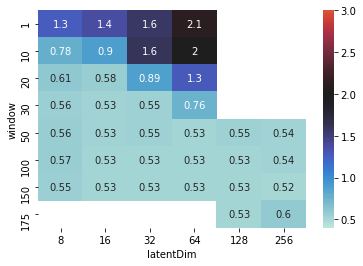

In [7]:
sns.heatmap(results.pivot('window','latentDim','lin_rel_err'),annot=True,center=2, vmin=heat_min, vmax=heat_max)
plt.show()

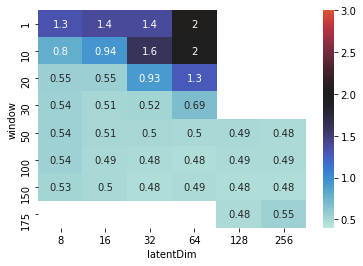

In [8]:
sns.heatmap(build_result_df(np.median).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, 
            vmin=heat_min, vmax=heat_max)
plt.show()

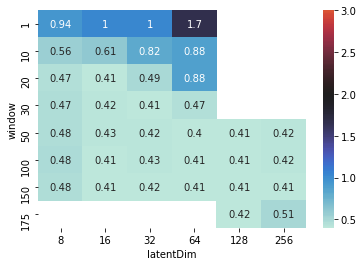

In [9]:
sns.heatmap(build_result_df(np.min).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, 
            vmin=heat_min, vmax=heat_max)
plt.show()

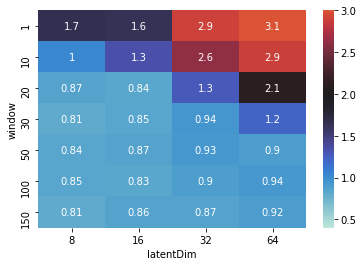

In [10]:
sns.heatmap(build_result_df(np.max).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, 
            vmin=heat_min, vmax=heat_max)
plt.show()